In [332]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import time

In [333]:
class nn(object):
    def __init__(self,inputnode,hiddennode,outputnode,lr):
        #nodes
        self.input = inputnode
        self.hidden = hiddennode
        self.output = outputnode
        
        #learning rate
        self.lr = lr
        
        #weight matrix
        self.w_i_h = np.random.normal(0,pow(self.hidden,-0.5),(self.input,self.hidden))
        self.w_h_o = np.random.normal(0,pow(self.output,-0.5),(self.hidden,self.output))
        
        #active function
        
        
    
    def active_function(self,x):
        return 1/(1+np.exp(-x))
    
    def train(self,input_list,targets):
        inputs = np.array(input_list,ndmin=2).T
        targets = np.array(targets,ndmin=2).T   #targets denotes the label
        
        hidden_inputs = np.matmul(self.w_i_h.T,inputs)
        hidden_outputs = self.active_function(hidden_inputs) #(100,1)
        
        output_inputs = np.matmul(self.w_h_o.T,hidden_outputs)
        output_outputs = self.active_function(output_inputs) #(10,1)
        
        output_error = targets - output_outputs  #(10,1)
        hidden_error = np.matmul(self.w_h_o,output_error)  #row vector(1,100)
        
        
        #update w_h_o weights
        self.w_h_o += self.lr * np.matmul(output_error*output_outputs*(1-output_outputs),hidden_outputs.T).T
        #[(10,1).(1,100)].T=(10,100).T=(100,10)
        
        #update w_i_h weights
        self.w_i_h +=self.lr *np.matmul(hidden_error*hidden_outputs*(1-hidden_outputs),inputs.T).T
        
        self.loss = [0]
        self.loss +=  np.linalg.norm(output_error)
        
        pass
        
    def test(self,input_list):
        inputs = np.array(input_list,ndmin=2).T
        hidden_inputs = np.dot(self.w_i_h.T,inputs)
        hidden_outputs = self.active_function(hidden_inputs)
        output_inputs = np.dot(self.w_h_o.T,hidden_outputs)
        output_outputs = self.active_function(output_inputs)
        
        return output_outputs


In [334]:
'''input_list=np.array([1,2,3])
targets=np.array([3,4])
nn=nn(3,4,2,0.3)
nn.train(input_list,targets)
nn.loss
'''

'input_list=np.array([1,2,3])\ntargets=np.array([3,4])\nnn=nn(3,4,2,0.3)\nnn.train(input_list,targets)\nnn.loss\n'

In [335]:
data_file = open("mnist_train.csv",'r')
data_list = data_file.readlines()
data_file.close()
#len(data_list)
data_list[1]

'0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,159,253,159,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,252,237,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,54,227,253,252,239,233,252,57,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,10,60,224,252,253,252,202,84,252,253,122,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,163,252,252,252,253,252,252,96,189,253,167,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,51,238,253,253,190,114,253,228,47,79,255,168,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,48,238,252,252,179,12,75,121,21,0,0,253,243,50,0,0,0,0,0,0,0,0,0,0,0,0,0,38,165,253,233,208,84,0,0,0,0,0,0,253,252,165,0,0,0,0,0,0,0,0,0,0,0,0,7,178,252,240,71,19,28,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,57,252,252,63,0,0,0,0,0,0,0,0,0,253,252,195,0,0,0,0,0,0,0,0,0,0,0,0,198,253,190,0,0,0,0,0,0,0,0,0,0,255,253,196

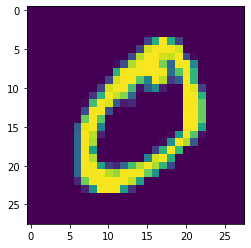

In [336]:
all_values = data_list[1].split(',')
image_array = np.asfarray(all_values[1:]).reshape(28,28)
plt.imshow(image_array)

In [337]:
input_nodes = 784
hidden_nodes = 100
output_nodes = 10
lr = 0.01
nn = nn(input_nodes,hidden_nodes,output_nodes,lr)
training_set = open("mnist_train.csv",'r')
training_list = training_set.readlines()
training_set.close()

In [338]:
#training
loss_record=[]
time_record=0
epoch = 10
for iter in range(epoch):
    loss = 0
    start = time.time()
    for record in training_list:
        all_values = record.split(',')
        #scaled
        inputs = np.asfarray(all_values[1:])/255*0.99+0.01
    
        targets = np.zeros(output_nodes)+0.01
        targets[int(all_values[0])] = 0.99  #all_values[0] is the target label
    
        nn.train(inputs,targets)
        loss += nn.loss
        
    loss /= len(training_list)
    print("the loss of epoch "+str(iter+1)+" is: "+str(loss))
    end = time.time()
    print("spending time of epoch "+str(iter+1)+" is: "+str(end-start))
    time_record += end-start
    loss_record.append(loss)
    
print("The training is ending.")
print("The total time spending is: "+str(time_record))


the loss of epoch 1 is: [0.3443881]
spending time of epoch 1 is: 70.60708999633789
the loss of epoch 2 is: [0.23503526]
spending time of epoch 2 is: 71.68919086456299
the loss of epoch 3 is: [0.20163313]
spending time of epoch 3 is: 75.0121078491211
the loss of epoch 4 is: [0.18093641]
spending time of epoch 4 is: 75.23270225524902
the loss of epoch 5 is: [0.16664678]
spending time of epoch 5 is: 79.04243326187134
the loss of epoch 6 is: [0.1562589]
spending time of epoch 6 is: 73.87356805801392
the loss of epoch 7 is: [0.1480714]
spending time of epoch 7 is: 76.49595952033997
the loss of epoch 8 is: [0.14119632]
spending time of epoch 8 is: 66.74573373794556
the loss of epoch 9 is: [0.13537722]
spending time of epoch 9 is: 69.13522791862488
the loss of epoch 10 is: [0.13038936]
spending time of epoch 10 is: 66.84105110168457
The training is ending.
The total time spending is: 724.6750645637512


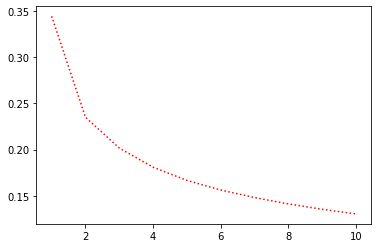

In [339]:
x = np.arange(epoch)+1
y = loss_record
plt.plot(x,y,'r:')
plt.show()

In [340]:
nn.w_i_h

array([[ 0.08991006,  0.03770446,  0.0246418 , ..., -0.05867071,
         0.09586818, -0.05741204],
       [-0.0866264 , -0.04500336, -0.02648513, ...,  0.16996765,
         0.08025767,  0.03143931],
       [ 0.03864418, -0.08902764,  0.02589538, ..., -0.04131895,
         0.10368398,  0.12454816],
       ...,
       [-0.1193747 , -0.0111105 , -0.10891667, ..., -0.19050341,
        -0.01482126,  0.00143133],
       [-0.06775961,  0.09669152,  0.1382405 , ...,  0.01950502,
         0.0574083 , -0.02871318],
       [-0.01975765, -0.09136417,  0.03739336, ...,  0.15168141,
         0.1810133 ,  0.00044876]])

In [341]:
nn.w_h_o

array([[ 2.78089231e-01,  2.15692809e-01,  7.50354382e-02,
        -2.02644755e-01,  2.04475613e-01, -6.32691526e-01,
        -2.69962307e-01,  1.21796409e-01, -9.40304531e-01,
        -4.65941609e-01],
       [-1.25579148e+00, -2.04774018e-01,  9.07765413e-01,
        -3.17046417e-01,  6.92853344e-01,  3.01770566e-01,
        -5.64166639e-01,  1.90583418e-01, -6.42714920e-01,
        -3.52734420e-01],
       [ 3.83652714e-01,  3.14069697e-01, -2.76337978e-01,
        -6.33277185e-01, -2.67556773e-02, -3.29385427e-01,
        -2.65014939e-01,  2.88791602e-02,  8.44081384e-01,
        -6.90403601e-02],
       [ 3.83604233e-01, -4.18512355e-01,  7.25865786e-01,
         9.84206416e-01,  2.52762340e-01, -5.40910242e-01,
        -1.02000821e+00, -2.67894391e-01, -3.03096104e-01,
        -1.14951263e-01],
       [ 4.32842805e-01, -2.35176176e-01, -8.52933933e-01,
        -1.01428780e+00,  1.25839576e+00,  4.43242457e-01,
        -2.85452744e-01, -7.17631215e-01,  1.34745462e+00,
        -8.

In [342]:
#testing
test_set = open("mnist_test.csv",'r')
test_list = test_set.readlines()
test_set.close()

correct_num = 0

for record in test_list:
    all_values = record.split(',')
    correct_label = int(all_values[0])
    input_list = np.asfarray(all_values[1:])/255*0.99+0.01
    outputs = nn.test(input_list)
    pre_label = np.argmax(outputs)
    
    if(pre_label==correct_label):
        correct_num += 1
    
correct_rate = correct_num/len(test_list)
print("correct rate is: "+str(correct_rate))

correct rate is: 0.9656


In [343]:
lr_correct[0.01]=0.9656

In [300]:
lr_correct[0.3]=0.9428

In [380]:
lr_correct

{0: 0, 0.1: 0.9665, 0.3: 0.9428, 0.2: 0.9616, 0.05: 0.967, 0.01: 0.9656}

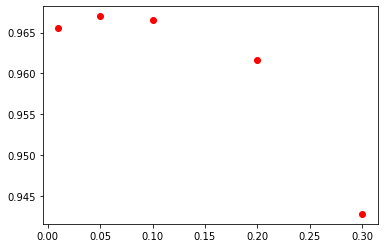

[0.9656 0.967  0.9665 0.9616 0.9428]


In [409]:
lr_list = sorted(lr_correct.keys())
lr_list.pop(0)
acc=np.zeros(5)

for i in range(len(lr_list)):
    acc_rate = lr_correct[lr_list[i]]
    acc[i] = acc_rate  #此处有个很有趣的现象：用循环赋值给非零列表，结果列表元素全部归0；另外，append()函数参数不能放表达式
    
plt.plot(lr_list,acc,'ro')
plt.show()
print(acc)